In [1]:
import sklearn as skl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.cluster
import glob
import dataproc
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import dataproc.operations
from dataproc.operations.hitp import bayesian_block_finder
from dataproc.operations.hitp import fit_peak
from dataproc.operations.hitp import load_image
from feature_extract import feat_extr
from data_grid_TiNiSn import DataGrid, DataGrid_TiNiSn_500C, DataGrid_TiNiSn_600C

In [2]:
DataGrid_TiNiSn_500C?

Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
Maximum number of peaks:  800
(177, 800)
15577


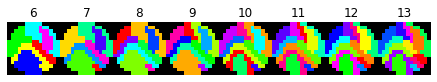

In [3]:
#This is Sasha's script, not important
import PCA_clustering

## Trying out the K-Batch Example from Scikitlearn

In [4]:
X = np.array([[1, 2], [1, 4], [1, 0],
...               [4, 2], [4, 0], [4, 4],
...               [4, 5], [0, 1], [2, 2],
...               [3, 2], [5, 5], [1, -1]])

# manually fit on batches

kmeans = MiniBatchKMeans(n_clusters=3, random_state=0, batch_size=6)

kmeans = kmeans.partial_fit(X[0:6,:])
kmeans = kmeans.partial_fit(X[6:12,:])
kmeans.cluster_centers_
kmeans.predict([[0, 0], [4, 4]])

# fit on the whole data

kmeans = MiniBatchKMeans(n_clusters=2,random_state=0, batch_size=6, max_iter=10).fit(X)
kmeans.cluster_centers_
kmeans.predict([[0,0],[4,4]])

array([1, 0])

In [5]:
kmeans.predict([[0, 0], [4, 4]])


array([1, 0])

In [6]:
# fit on the whole data
kmeans = MiniBatchKMeans(n_clusters=2,random_state=0, batch_size=6, max_iter=10).fit(X)
kmeans.cluster_centers_
kmeans.predict([[0,0],[4,4]])

array([1, 0])

In [7]:
from dataproc.operations.peakShapes import voigtFn

In [8]:
# Don't run this!!! Code extracts features which have already been extracted and saved.
# And the code takes a while


#XX = feat_extr()
#np.shape(X)

## Trying K-Batch on a just datapoint 175 of the TiNiSn_500C dataset but ....

In [9]:
#Reading the file of already extracted features for datapoint 175
mmm = pd.read_csv('Params_TiNiSn_500C_0175.csv', names = ['x0','y0','I','alpha','gamma','FWHM','area','area-err','X0'])

In [10]:
mmm

,x0,y0,I,alpha,gamma,FWHM,area,area-err,X0
0,1.659918,0.003452,1.996841e-01,2.996731e-02,8.472254e-24,0.070568,0.199670,1.073183e-11,1.659918
1,1.738750,-2.089492,3.475774e+00,5.625001e-02,5.625001e-02,0.202358,0.842805,1.037732e-12,1.738750
2,1.576584,-4.968902,6.109925e+00,5.625001e-02,4.406265e-02,0.185246,3.045037,4.489329e-11,1.576584
3,1.738750,-4.976522,1.805598e+00,5.625001e-02,5.625001e-02,0.202358,-0.437670,5.390828e-13,1.738750
4,1.795106,-10.953411,1.864876e+00,1.592713e-02,1.364628e-02,0.054067,-0.310099,1.862917e-10,1.795106
5,1.847596,16.683967,5.149456e-01,4.499585e-02,2.325473e-02,0.132399,3.398985,1.847461e-11,1.847596
6,1.919902,3.782597,2.085336e-01,2.366059e-02,1.046510e-08,0.055716,0.755172,5.102650e-14,1.919902
7,1.756939,3.638995,2.549058e-02,1.140298e-02,3.311122e-16,0.026852,0.680362,1.565116e-11,1.756939
8,2.061912,-9.225684,3.305507e-01,1.351866e-02,2.350804e-33,0.031834,-3.867136,1.179299e-09,2.061912
9,1.981985,5.989405,5.120476e-02,8.074426e-03,2.157064e-03,0.021329,2.775743,5.278286e-09,1.981985


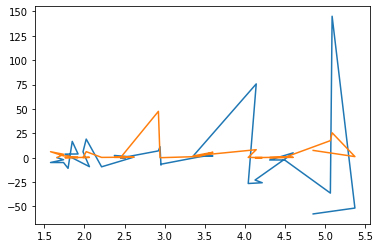

In [11]:
plt.plot(mmm['x0'].values,mmm['y0'].values)
plt.plot(mmm['x0'].values,mmm['I'].values)

In [23]:
# I might be doing the wrong thing here. XX shd contain the extracted features for the 177 datapoints from TiNiSn_500C
#but I already commented out the part that defines XX
# I still don't understand why I wanted to fit those featured with MiniBatchKMeans. Some beginners' issues here lol


# XX = np.array(XX) 
# clustr = MiniBatchKMeans(n_clusters=3, random_state=0, batch_size=6)
# mm = int(len(XX)/2)
# clustr = clustr.partial_fit(XX[0:mm,:])
# clustr = clustr.partial_fit(XX[mm:len(X),:])
# clustr.cluster_centers_
# clustr.predict([[0, 0], [4, 4]])

In [24]:
# # fit on the whole data

# clustr = MiniBatchKMeans(n_clusters=2,random_state=0, batch_size=6, max_iter=10).fit(XX)
# clustr.cluster_centers_
# clustr.predict([[0,0],[4,4]])

In [31]:
# Just trying some naming stuff for my feat_extr() script
for I in range(1,4):
        if I > 99:
            II = "0" + str(I)
        elif I > 9:
            II = "00" + str(I)
        else: 
            II = "000" + str(I)
            
        filename = "C:/Users/oluwa/Downloads\TiNiSn_500C_Y20190218_14x14_t60_" + II + "_bkgdSub_1D.csv"
        print(filename)
    

C:/Users/oluwa/Downloads\TiNiSn_500C_Y20190218_14x14_t60_0001_bkgdSub_1D.csv
C:/Users/oluwa/Downloads\TiNiSn_500C_Y20190218_14x14_t60_0002_bkgdSub_1D.csv
C:/Users/oluwa/Downloads\TiNiSn_500C_Y20190218_14x14_t60_0003_bkgdSub_1D.csv


In [26]:
II='0175'

In [27]:
#np.savetxt('Params_TiNiSn_500C_' + II +'.csv',fullp,delimiter =',')

In [28]:
len(mmm.keys())

9

In [29]:
np.shape(mmm)

(36, 9)

In [30]:
mmm.keys()

Index(['x0', 'y0', 'I', 'alpha', 'gamma', 'FWHM', 'area', 'area-err', 'X0'], dtype='object')